In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# 1. data
n=1000

xs =np.random.uniform(-10,10,size=(n,1))
zs = np.random.uniform(-10,10,(n,1))

generated_inputs =np.column_stack((xs,zs))
noise =np.random.uniform(-1,1,(n,1))

generated_targets = 2*xs -3*zs+5+noise

np.savez('TF_intro', inputs = generated_inputs, targets = generated_targets)

In [8]:
training_data = np.load('TF_intro.npz')

In [11]:
# 2. model 
input_size =2
output_size =1
# we have to build the model for tensorflow 
#tf.keras.Sequential() function that specifies how the model will be laid down
#('stacks layers')
#tf.keras.layers.Dense(output size) takes the inputs provided to the model and 
# calculates the dot product of the inputs and weights and add the bias 
#same as out =np.dot(inputs,weights)+bias
model =tf.keras.Sequential([tf.keras.layers.Dense(output_size)])

#model.compile(optimizer,loss) configures the model for training 
# we want to make this example as close as possible to the NumPy minimal example, 
# so we have to use L2-norm(=last sum of squares) loss, scaled by the number of observations(mean) 
# 3. objective function, 4.optimization algorithm
model.compile(optimizer ='sgd',loss ='mean_squared_error')

#model.fit(inputs,targets) fits (trains)the model 
#epochs = the number of iteration
#verbose =0 means 'silent' or no ouput about the training is displayed 
model.fit(training_data['inputs'],training_data['targets'],epochs=100,verbose=2)

Epoch 1/100
1000/1000 - 0s - loss: 26.8302
Epoch 2/100
1000/1000 - 0s - loss: 4.4563
Epoch 3/100
1000/1000 - 0s - loss: 1.4879
Epoch 4/100
1000/1000 - 0s - loss: 0.6547
Epoch 5/100
1000/1000 - 0s - loss: 0.4398
Epoch 6/100
1000/1000 - 0s - loss: 0.3666
Epoch 7/100
1000/1000 - 0s - loss: 0.3616
Epoch 8/100
1000/1000 - 0s - loss: 0.3486
Epoch 9/100
1000/1000 - 0s - loss: 0.3511
Epoch 10/100
1000/1000 - 0s - loss: 0.3595
Epoch 11/100
1000/1000 - 0s - loss: 0.3472
Epoch 12/100
1000/1000 - 0s - loss: 0.3515
Epoch 13/100
1000/1000 - 0s - loss: 0.3568
Epoch 14/100
1000/1000 - 0s - loss: 0.3542
Epoch 15/100
1000/1000 - 0s - loss: 0.3554
Epoch 16/100
1000/1000 - 0s - loss: 0.3501
Epoch 17/100
1000/1000 - 0s - loss: 0.3457
Epoch 18/100
1000/1000 - 0s - loss: 0.3486
Epoch 19/100
1000/1000 - 0s - loss: 0.3602
Epoch 20/100
1000/1000 - 0s - loss: 0.3487
Epoch 21/100
1000/1000 - 0s - loss: 0.3466
Epoch 22/100
1000/1000 - 0s - loss: 0.3596
Epoch 23/100
1000/1000 - 0s - loss: 0.3482
Epoch 24/100
1000/1

In [12]:
# Extract the weights and bias
#layers[0] : zero position of layers
model.layers[0].get_weights()

[array([[ 1.9919113],
        [-3.0212493]], dtype=float32), array([5.0076017], dtype=float32)]

In [14]:
weights =model.layers[0].get_weights()[0]
weights

array([[ 1.9919113],
       [-3.0212493]], dtype=float32)

In [15]:
bias =model.layers[0].get_weights()[1]
bias

array([5.0076017], dtype=float32)

In [17]:
#Extract the outputs (make predictions)
model.predict_on_batch(training_data['inputs']).round(1)
#these are the values that were compared to the targets to evaluate the loss function


array([[ 20.1],
       [-27.2],
       [ -9.6],
       [-10.8],
       [-14.1],
       [-13.1],
       [-19.3],
       [  1.8],
       [-23.7],
       [ 32.9],
       [ -7.9],
       [ -4.4],
       [-13.6],
       [  8.6],
       [ 23.8],
       [ 11.1],
       [ -6. ],
       [ 25.4],
       [ 40. ],
       [ 12.9],
       [ -2.4],
       [ 12.1],
       [  4. ],
       [ 27.4],
       [  1.4],
       [ 44.8],
       [ 14.9],
       [-12.5],
       [ 11.3],
       [  8.4],
       [ 18.2],
       [ 36.5],
       [ 15.4],
       [ -4.3],
       [-15.9],
       [ 12.1],
       [ 22.3],
       [-25.5],
       [-20.3],
       [  6.2],
       [ 22.8],
       [-20.3],
       [ 19.4],
       [-29.9],
       [  9.7],
       [ 11.6],
       [  5.1],
       [ 32.7],
       [ 47.5],
       [ 17.2],
       [-18.9],
       [-24.3],
       [ 28.2],
       [-16.4],
       [ -8.6],
       [ -5.7],
       [ 24.4],
       [  7.3],
       [ 10. ],
       [ -8.4],
       [ -3.5],
       [-22. ],
       [

In [18]:
training_data['targets'].round(1)

array([[ 19.2],
       [-27.2],
       [-10.5],
       [-10.8],
       [-15. ],
       [-13.8],
       [-20. ],
       [  2.4],
       [-22.9],
       [ 32.5],
       [ -7.5],
       [ -3.3],
       [-13.7],
       [  9.3],
       [ 24.6],
       [ 10.6],
       [ -4.9],
       [ 24.7],
       [ 40.1],
       [ 12.2],
       [ -2.4],
       [ 12.1],
       [  3.9],
       [ 26.4],
       [  2.2],
       [ 45.3],
       [ 14.9],
       [-11.9],
       [ 11.2],
       [  8.6],
       [ 18.2],
       [ 37.1],
       [ 15.2],
       [ -3.3],
       [-15.6],
       [ 12.3],
       [ 21.9],
       [-25.3],
       [-20.6],
       [  6.7],
       [ 22.2],
       [-19.2],
       [ 19.5],
       [-29.2],
       [  8.9],
       [ 12.3],
       [  4.3],
       [ 31.5],
       [ 47.4],
       [ 17.9],
       [-19.4],
       [-24.3],
       [ 29.1],
       [-15.4],
       [ -7.8],
       [ -6.5],
       [ 24.4],
       [  6.7],
       [ 10.7],
       [ -7.6],
       [ -2.6],
       [-21.5],
       [

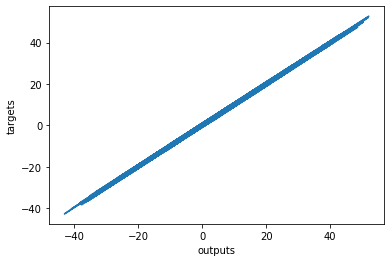

In [20]:
#plotting the data

plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])),np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()